## LIBRERÍAS A UTILIZAR

In [1]:
import numpy as np
import pandas as pd
from sklearn import  linear_model
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
viviendas = pd.read_csv('Datos_Viviendas.csv',header=0 ,sep=';')

# Visualización de los datos.

In [3]:
viviendas.head(10)

,Ubicación,Precio,Habitaciones,Baños,Planta,Metros Cuadrados,Ascensor,Balcon,Terraza,Calefaccion,Aire Acondicionado,Piscina,Extras,Parking
0,"Piso en Calle Mayor, 55",145000,4,2,5,145.0,Ascensor,Balcón,Terraza,Calefacción,Aire acondicionado,NaN,5,Parking
1,Piso en Centro,399000,3,2,2,125.0,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,NaN,6,Parking
2,Piso en Centro,395000,4,2,2,172.0,Ascensor,NaN,Terraza,Calefaccion,Aire acondicionado,Piscina,10,Parking
3,Piso en Centro,189500,3,2,1,104.0,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,NaN,1,Parking
4,Piso en Centro,370000,5,2,3,103.0,Ascensor,NaN,Terraza,Calefaccion,Aire acondicionado,NaN,3,Parking
5,Piso en Centro,178000,2,2,4,130.0,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,Piscina,5,Parking
6,Piso en Centro,385000,4,2,1,188.0,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,Piscina,3,Parking
7,Piso en Norte,335000,3,2,7,180.0,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,Piscina,5,Parking
8,Piso en Centro,250000,4,1,2,106.0,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,NaN,5,Parking
9,Piso en Sur,119000,5,2,1,146.0,Ascensor,NaN,Terraza,Calefaccion,Aire acondicionado,NaN,6,Parking


Ahora voy a visualizar cuantas filas y columnas cuenta mi dataset, esto nos hace una idea para ver si el dataset el 
cual vamos a analizar nos sirve o en su caso cambiarlo por otro.

In [4]:
print(viviendas.shape)

(11345, 14)


In [5]:
print(viviendas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ubicación           11345 non-null  object 
 1   Precio              11345 non-null  int64  
 2   Habitaciones        11345 non-null  int64  
 3   Baños               11345 non-null  int64  
 4   Planta              11345 non-null  int64  
 5   Metros Cuadrados    11345 non-null  float64
 6   Ascensor            9111 non-null   object 
 7   Balcon              6907 non-null   object 
 8   Terraza             6023 non-null   object 
 9   Calefaccion         6537 non-null   object 
 10  Aire Acondicionado  9475 non-null   object 
 11  Piscina             2218 non-null   object 
 12  Extras              11345 non-null  int64  
 13  Parking             11195 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.2+ MB
None


Antes de hacer nada en mi dataset,voy a visualizar con cuantos campos vacíos me voy a encontrar.

In [6]:
columnas = viviendas.columns.tolist()

for column in columnas:
    print("Valores nulos en <{0}>: {1}".format(column, viviendas[column].isnull().sum()))

Valores nulos en <Ubicación>: 0
Valores nulos en <Precio>: 0
Valores nulos en <Habitaciones>: 0
Valores nulos en <Baños>: 0
Valores nulos en <Planta>: 0
Valores nulos en <Metros Cuadrados>: 0
Valores nulos en <Ascensor>: 2234
Valores nulos en <Balcon>: 4438
Valores nulos en <Terraza>: 5322
Valores nulos en <Calefaccion>: 4808
Valores nulos en <Aire Acondicionado>: 1870
Valores nulos en <Piscina>: 9127
Valores nulos en <Extras>: 0
Valores nulos en <Parking>: 150


# Vamos a codificar las variables categoricas en valores númericos.

In [4]:
from sklearn import preprocessing

transfor_datos = preprocessing.LabelEncoder()
viviendas = viviendas.apply(transfor_datos.fit_transform)

print(viviendas.keys())

Index(['Ubicación', 'Precio', 'Habitaciones', 'Baños', 'Planta',
       'Metros Cuadrados', 'Ascensor', 'Balcon', 'Terraza', 'Calefaccion',
       'Aire Acondicionado', 'Piscina', 'Extras', 'Parking'],
      dtype='object')


In [8]:
print(viviendas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Ubicación           11345 non-null  int64
 1   Precio              11345 non-null  int64
 2   Habitaciones        11345 non-null  int64
 3   Baños               11345 non-null  int64
 4   Planta              11345 non-null  int64
 5   Metros Cuadrados    11345 non-null  int64
 6   Ascensor            11345 non-null  int64
 7   Balcon              11345 non-null  int64
 8   Terraza             11345 non-null  int64
 9   Calefaccion         11345 non-null  int64
 10  Aire Acondicionado  11345 non-null  int64
 11  Piscina             11345 non-null  int64
 12  Extras              11345 non-null  int64
 13  Parking             11345 non-null  int64
dtypes: int64(14)
memory usage: 1.2 MB
None


In [5]:
X = viviendas[['Habitaciones', 'Baños', 'Planta','Metros Cuadrados','Ascensor','Balcon','Terraza','Calefaccion',
              'Aire Acondicionado','Piscina','Extras','Parking']]
y = viviendas['Precio']

#### Preparación de los datos del modelo.

In [6]:
from sklearn.model_selection import train_test_split

# Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Implementación del Modelo.
 - Implementamos el modelo utilizando Keras. El modelo posee 50 neurona más una capa de Activación 
 - Sigmoide, Adam como optimizador , Entropía Cruzada para la función de error y Accuracy como métrica. 


In [53]:

# 2 capas Intermedias con 3 neuronas
capa_oculta1 = keras.layers.Dense(units=300, input_shape=[12])
capa_oculta2 = keras.layers.Dense(units=300)
# 1 salida
salida = keras.layers.Dense(units=1)

# Vamos a utilizar la funcion de activación sigmoidal
activacion = keras.layers.Activation('relu')

model = keras.Sequential([capa_oculta1,capa_oculta2,salida,activacion])

model.compile(
    keras.optimizers.Adam(0.0004),
    loss ='binary_crossentropy',
    metrics = ['accuracy']
)

#### Visualizacíon de las variables intermedias.

In [54]:
# Podemos ver las variables intermedias. El algoritmo interpreta que estás combinaciones podrán llegar al resultado 
# más óptimo. 
print("\n Combinaciones internas Capa_Oculta_1 \n\n", capa_oculta1.get_weights())
print("\n Combinaciones internas Capa_Oculta_2 \n\n", capa_oculta2.get_weights())
print("\n Combinaciones Salida \n\n", salida.get_weights())


 Combinaciones internas Capa_Oculta_1 

 [array([[-0.03843064,  0.13801579,  0.05048893, ..., -0.06189422,
         0.0791872 , -0.05257652],
       [-0.02012993, -0.0096927 , -0.13071233, ..., -0.12188689,
        -0.09338155,  0.05859621],
       [-0.03165249, -0.10166624,  0.09708703, ...,  0.12657799,
         0.11788027,  0.09232427],
       ...,
       [ 0.00171235, -0.13431183,  0.0987556 , ..., -0.12605369,
        -0.10545123, -0.02598415],
       [ 0.09748897, -0.138213  , -0.13716769, ...,  0.01769163,
         0.05057411, -0.09288819],
       [-0.10482641,  0.07730842,  0.11585785, ...,  0.12442397,
        -0.11587441, -0.05494054]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0

#### Entrenamiento del Modelo.

In [55]:
# Voy a emplear 100 vueltas, es un número al azar, posteriormente veremos si este modelo se ha ajustado, 
# si no es así le subiremos las vueltas. Le indicaremos un verbose=false para que no nos imprima nada por
# pantalla, ya que es mucho texto el que saldrá.

print('Comenzamos a entrenar datos de entrenamiento.........')
training_model = model.fit(X_train.values, y_train.values, epochs = 100,batch_size=300)
print('Fin del entrenamiento ......')

Comenzamos a entrenar datos de entrenamiento.........
Train on 9076 samples
Epoch 1/100
9076/9076 [==============================] - 1s 109us/sample - loss: -70166.0504 - accuracy: 0.0000e+00
Epoch 2/100
9076/9076 [==============================] - 0s 33us/sample - loss: -70192.6338 - accuracy: 0.0000e+00
Epoch 3/100
9076/9076 [==============================] - 0s 33us/sample - loss: -70192.6333 - accuracy: 0.0000e+00
Epoch 4/100
9076/9076 [==============================] - 0s 32us/sample - loss: -70192.6338 - accuracy: 0.0000e+00
Epoch 5/100
9076/9076 [==============================] - 0s 36us/sample - loss: -70192.6346 - accuracy: 0.0000e+00
Epoch 6/100
9076/9076 [==============================] - 0s 37us/sample - loss: -70192.6347 - accuracy: 0.0000e+00
Epoch 7/100
9076/9076 [==============================] - 0s 37us/sample - loss: -70192.6344 - accuracy: 0.0000e+00
Epoch 8/100
9076/9076 [==============================] - 0s 32us/sample - loss: -70192.6348 - accuracy: 0.0000e+00
Epo

9076/9076 [==============================] - 0s 31us/sample - loss: -70192.6336 - accuracy: 0.0000e+00
Epoch 72/100
9076/9076 [==============================] - 0s 31us/sample - loss: -70192.6360 - accuracy: 0.0000e+00
Epoch 73/100
9076/9076 [==============================] - 0s 31us/sample - loss: -70192.6335 - accuracy: 0.0000e+00
Epoch 74/100
9076/9076 [==============================] - 0s 31us/sample - loss: -70192.6321 - accuracy: 0.0000e+00
Epoch 75/100
9076/9076 [==============================] - 0s 31us/sample - loss: -70192.6337 - accuracy: 0.0000e+00
Epoch 76/100
9076/9076 [==============================] - 0s 31us/sample - loss: -70192.6329 - accuracy: 0.0000e+00
Epoch 77/100
9076/9076 [==============================] - 0s 31us/sample - loss: -70192.6335 - accuracy: 0.0000e+00
Epoch 78/100
9076/9076 [==============================] - 0s 30us/sample - loss: -70192.6345 - accuracy: 0.0000e+00
Epoch 79/100
9076/9076 [==============================] - 0s 31us/sample - loss: -701

#### Visualizacíon de la función de perdida.

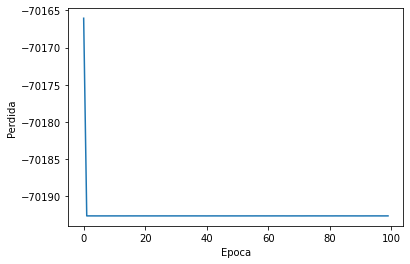

In [56]:
# Una vez que tenemos entrenado el modelo y listo para realizar las predicciones, vamos a 
# vamos a ver el resultado de la función de perdida. La función de pérdida mide la capacidad del modelo para 
# predecir los resultados esperados.
plt.xlabel("Epoca")
plt.ylabel("Perdida")
plt.plot(training_model.history["loss"])



## Regresión Lineal.

In [57]:
# Definimos el algoritmo a usar "Regresión Lineal"
lr = linear_model.LinearRegression()

# Entrenamos el modelo
lr.fit(X_train, y_train)

# Realizamos la predicción
Y_pred = lr.predict(X_test)

### Calculamos los datos de la pendiente y la interseccion

In [58]:
print()
print('DATOS DEL MODELO REGRESIÓN LINEAL')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)


DATOS DEL MODELO REGRESIÓN LINEAL

Valor de la pendiente o coeficiente "a":
[-304.63922988   97.88794504  320.05248636    3.86759502   23.13630593
    9.71057488  -43.43179134   -1.24336035  -64.05112244 -274.66773164
  -43.99808291  527.81988999]
Valor de la intersección o coeficiente "b":
5681.341144025081


#### Ahora juntamos la ecuación por completo


In [59]:
print('La ecuación del modelo es igual a:')
print('y =', lr.coef_, 'x ', lr.intercept_)

La ecuación del modelo es igual a:
y = [-304.63922988   97.88794504  320.05248636    3.86759502   23.13630593
    9.71057488  -43.43179134   -1.24336035  -64.05112244 -274.66773164
  -43.99808291  527.81988999] x  5681.341144025081


# Precisión del Modelo.

In [60]:
print('Precisión del modelo')
print(lr.score(X_train, y_train))

Precisión del modelo
0.059731120549284755


In [66]:
from sklearn.linear_model import LinearRegression

regresionLineal = LinearRegression(normalize=True)
regresionLineal.fit(X_train,y_train)

/Users/joseplasenciavillarejo/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [67]:
y_pred=regresionLineal.predict(X_test)
pd.DataFrame({'Y_Test': y_test,'Y_Pred':Y_pred, 'Residuals':(y_test-y_pred) }).head(10)

,Y_Test,Y_Pred,Residuals
7358,180,3819.521926,-3639.521926
9393,4308,5078.843662,-770.843662
10694,7989,5837.714910,2151.285090
1287,6000,3897.891121,2102.108879
7620,3361,4472.454433,-1111.454433
10035,2693,5919.274733,-3226.274733
6229,1974,4697.717500,-2723.717500
5898,5181,4198.479593,982.520407
5417,462,3831.246722,-3369.246722
5283,2691,4967.966579,-2276.966579


# Vamos a calcular la Intercepción y el Coeficiente.

In [48]:
# Procedemos a calcular la intercepción, el cual indica el grado de inclinación que contendrá nuestra línea.
print(regresionLineal.intercept_)

5670.577588955799


In [59]:
# Procedemos a calcular el coeficiente que nos indicará cuanto aumentara de precio por cada unidad.
coeff_df = pd.DataFrame(regresionLineal.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Habitaciones,-285.636785
Baños,86.432933
Planta,335.605626
Metros Cuadrados,3.237708
Ascensor,14.567498
Balcon,16.855719
Terraza,-33.403840
Calefaccion,-10.886894
Aire Acondicionado,-60.646532
Piscina,-292.525223


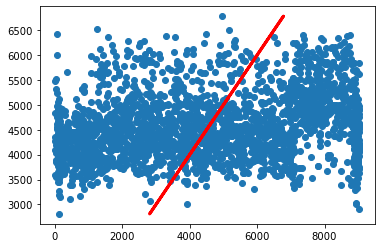

In [52]:
"""
Graficamos los datos junto con el modelo. Debemos recordar que debemos de reducir el máximo el error.
Esto se realizara juntando lo máximo posible el punto a la línea roja todos los datos fuera de la línea están en error
"""
prediccion = regresionLineal.predict(X_test)
plt.plot(prediccion, Y_pred,color='red',linewidth=3)
plt.scatter(y_test, prediccion)


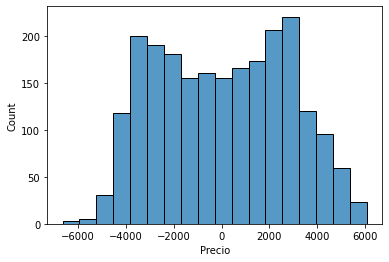

In [61]:
sns.histplot((y_test - prediccion), bins='auto');

# Vamos a comparar nuestro modelo de regresión lineal con el random forest, de modo que vamos a calcular lo siguientes campos.

* El error absoluto medio (MAE) es la media del valor absoluto de los errores
* El error cuadrático medio (MSE) es la media de los errores cuadráticos.
* El error cuadrático medio (RMSE) es la raíz cuadrada de la media de los errores cuadráticos.

In [62]:
# Primero calculamos el algoritmo de Regresión Lineal
from sklearn import metrics

def evaluarErrores(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

regresionLineal = LinearRegression()
regresionLineal.fit(X_train, y_train)

testPrediccion = regresionLineal.predict(X_test)
entrenamientoPrediccion = regresionLineal.predict(X_train)

resultadoRegresionLineal = pd.DataFrame(data=[["Linear Regression", *evaluarErrores(y_test, testPrediccion)]], 
                          columns=['Modelo', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
resultadoRegresionLineal


,Modelo,MAE,MSE,RMSE,R2 Square
0,Linear Regression,2358.764899,7.422138e+06,2724.360177,0.040573


In [41]:

from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators=1)
randomForest.fit(X_train, y_train)

testPrediccion = randomForest.predict(X_test)
entrenamientoPrediccion = randomForest.predict(X_train)

resultadoRandomForest = pd.DataFrame(data=[["Random Forest", *evaluarErrores(y_test, testPrediccion)]], 
                          columns=['Modelo', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
resultados = resultadoRegresionLineal.append(resultadoRandomForest, ignore_index=True)
resultados

,Modelo,MAE,MSE,RMSE,R2 Square
0,Linear Regression,2358.764899,7.422138e+06,2724.360177,0.040573
1,Random Forest,2871.441237,1.324701e+07,3639.644364,-0.712383


Comparacion entre los 2 modelos.........


<AxesSubplot:ylabel='Modelo'>

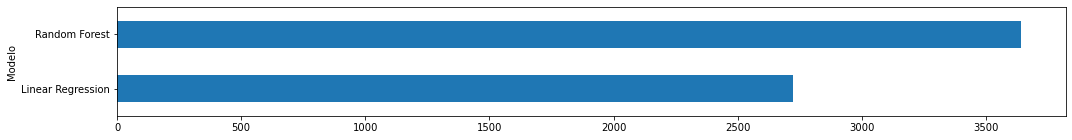

In [42]:
# Vamos a comparar los modelos empleados, tanto la regresión lineal como el Random Forest.

print('Comparacion entre los 2 modelos.........')
resultados.set_index('Modelo', inplace=True)
resultados['RMSE'].plot(kind='barh', figsize=(17, 2))